# **Python Setup**
## Start by running the next cell

In [2]:
#@title # Python Setup { display-mode: "form" }

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>

#@markdown <font color="red"><h3><b><i> Begin by running this cell.</i></b></h3> </font>

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>
!pip install exifread &> /dev/null

import os, sys
if 'google.colab' in str(get_ipython()):
  print('Google Colab Environment - Loading Dependencies...')
  !rm -r ImageSTEM imageSTEAM &> /dev/null
  !git clone https://github.com/ImagingLyceum-ASU/ImageSTEAM.git &> /dev/null
  !mv ImageSTEAM/imageSTEAM ./
  !rm -r ImageSTEAM
else:
  print('Local iPython Environment')
  dir1 = os.path.dirname(os.path.abspath('../../'))
  if not dir1 in sys.path: sys.path.append(dir1)

import imageSTEAM as steam
from imageSTEAM import *

print('Environment Ready!')

Google Colab Environment - Loading Dependencies...
Environment Ready!


# **Introduction**

- How can we use color to help computers manipulate images?
- visual effects

#  
<font color="red"> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
</font>


# **HSV Space**

Let's teach about Hue, Saturation and Value.

In [3]:
singlepixelHSVExample()


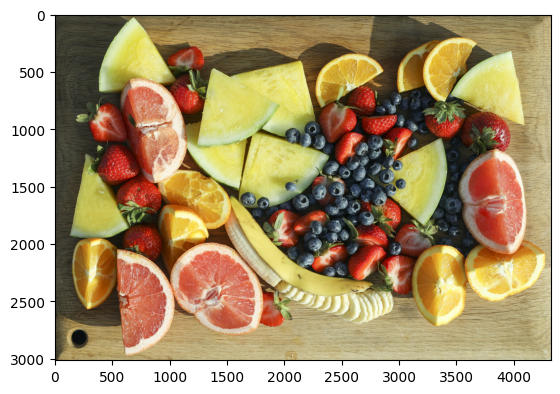

In [5]:
#@title # Python Setup { display-mode: "form" }

#@markdown Lets try applying this to a sample example image
#@markdown Use the slider to understand what changing each of the hue, saturation and values affect
pixel = cv2.imread('./imageSTEAM/data/fruits.jpg')
pixeldisp = cv2.cvtColor(pixel, cv2.COLOR_BGR2RGB)
display_img(pixeldisp)
pixelHSVExample_(pixel)

Saving dog.jpg to dog.jpg


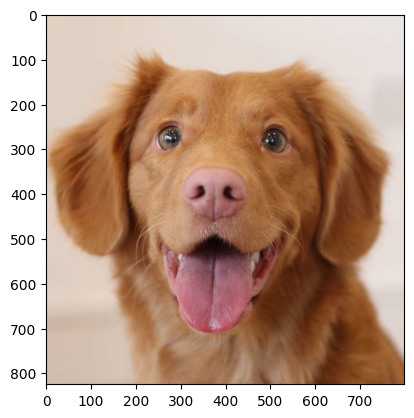

In [3]:
#@title # Python Setup { display-mode: "form" }

#@markdown Now try this on an image of your choice

#@markdown *Begin by uploading an image(.png, .jpg, etc)*
uploaded = files.upload()           # Use colab upload dialog.
uploaded = list(uploaded.keys())    # Get uploaded filenames.
assert len(uploaded) == 1           # Make sure only uploaded one file.
os.rename(uploaded[0], 'input.jpg') # Rename file to "input.mp4".
pixel = cv2.imread('input.jpg')
pixeldisp = cv2.cvtColor(pixel, cv2.COLOR_BGR2RGB)
display_img(pixeldisp)
pixelHSVExample_(pixel)

Now, let's see if we can identify all objects based on one color. This is known as segmentation.

In [4]:

#@title # Python Setup { display-mode: "form" }

#@markdown Lets try picking a color in HSV space, then segmenting all of the pixels of that color out of an image.

#@markdown Use the sliders to choose a color
image = steam.data.fruits()
h, w = image.shape[:2]
image = cv2.resize(image, (w//20,h//20))
print(image.shape)
HSVSegmentation(image)

(150, 216, 3)


One HSV value is pretty difficult, so maybe we should allow a range of them.

In [7]:
#@title # Python Setup { display-mode: "form" }
image = steam.data.fruits()
h, w = image.shape[:2]
image = cv2.resize(image, (w//20,h//20))
print(image.shape)
HSVSegmentationrange(image)

(150, 216, 3)


Saving dreamscapePixlr.png to dreamscapePixlr (1).png
User uploaded file "dreamscapePixlr (1).png" with length 1931310 bytes


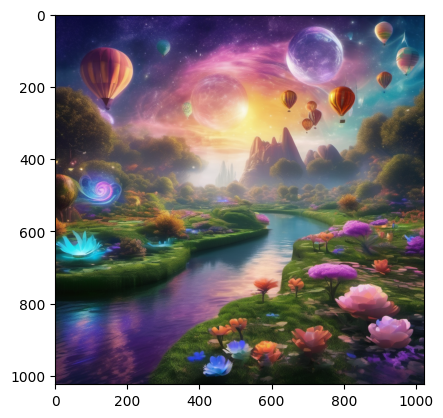

In [ ]:
#@title # Python Setup { display-mode: "form" }
#@markdown Let us try segmenting an image of your choice
#@markdown *Begin by uploading an image (.png, .jpg, etc)*
image = upload_image()
HSVSegmentationrange(image)

# **Activity: Green Screening**



In [5]:
#@title # Python Setup { display-mode: "form" }
#@markdown Let's look at how we can apply HSV and segmentation to visual effects

#@markdown Adjust the sliders so the green background in the Dr. Strange image is replaced with the image of New York City.


green = read_image('/content/imageSTEAM/data/greenscreen.jpg')
background = read_image('/content/imageSTEAM/data/greenscreen_bg.jpg')
background = background[:, :1999, :]
h1,w1 = green.shape[:2]
h2,w2 = background.shape[:2]

padding = ((h2-h1, 0), ((w2-w1)//2, (w2-w1)//2), (0,0))
green_pad = np.pad(green, pad_width=padding, mode='edge')

greenScreen(img_green=green_pad, img_background=background)

In [ ]:
H